#Assignment 2 - EMPTY

Create a program to evaluate the Generalization Error (GE), Prediction Model Error (ME) and Training Error (TE) for the k-nearest neighbors (KNN) learning approach. For doing so, compute the model considering neighborhood sizes from 1 to 35.

##Preliminary Code:

###Imports:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

###Built-in Custom Functions:

In [ ]:
def KNN(N_size, x_train, Y_train, x_test):
    '''
    This function implements the KNN regression learning model. The required
    inputs are the following:
    -   N_size (integer): size of the neighborhood. Automatically reduced to
    training dataset size if greater than it.
    -   x_train (1-D list): list of x values related to the training data set.
    -   Y_train (1-D list): list of Y values related to the training data set.
    -   x_test (1-D list): list of x values related to the testing data set.

    The function outputs the following:
    -   Y_hat (1-D list): list containing the KNN regressed values for the
    x_test data set according to the model training.
    '''

    N_size = np.minimum(len(x_train), N_size)

    x_i = [[x] for x in x_train]

    KNN = KNeighborsRegressor(N_size).fit(x_i, Y_train)

    x_i = [[x] for x in x_test]

    Y_hat = KNN.predict(x_i)

    return Y_hat


##Solution Code:

###Data Sets and Learning Model:


####Training Set:

With $N^{training} = 50$:


- Generate $x_i$, $N^{training}$ uniformly separated data points between 0 and 1.

- Generate $n_i$, $N^{training}$ noise data points randomly distributed with 0 mean and 0.1 variance.

- Build the observed data model as:

$Y_i^{training} = f(x_i) + n_i$, with $\space i = 1 ... N^{training}$ and $f(x) = sin(2 \pi · x)$

(50,)
(50,)


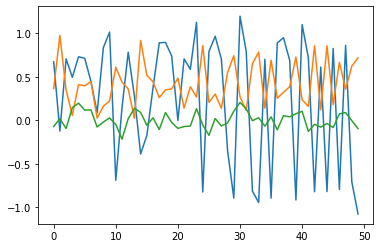

In [ ]:
import math
import numpy as np
from matplotlib.pyplot import figure,show
import matplotlib.pyplot as p


### Training set generation:
N = 50
x = np.random.uniform(0,1,N)
n = np.random.normal(0,0.1,N)
y = []
for i in range(N):
  # for j in i:
    y.append(math.sin(2*math.pi* x[i]) + n[i])
# print(len(x))
# print(len(n))
# print(len(f_x))
y = np.array(y).reshape(50,)
# +n

#Training set size? Y_training?
#Answer: Training set size is 50, Y_training size is 50.
print(x.shape)
print(y.shape)

### Training set representation
# p.scatter(x, y, color="navy", alpha=0.5)
p.plot(y)
p.plot(x)
p.plot(n)
show(p)
#Appearance of training set?
#Answer: It looks like a sparse sine curve.

####Testing Set:

With $N^{testing} = 300$:


- Follow the same previous steps, using $N^{testing}$ instead of $N^{training}$.

(300,)
(300,)


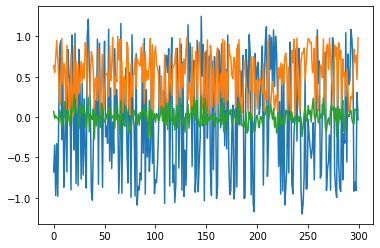

In [ ]:
### Testing set generation:
N_test = 300
x_test = np.random.uniform(0,1,N_test)
n_test = np.random.normal(0,0.1,N_test)
y_test = []
for i in range(N_test):
  # for j in i:
    y_test.append(math.sin(2*math.pi* x_test[i]) + n_test[i])

y_test = np.array(y_test).reshape(300,)
# +n_test
#Test set size? Y_training?
#Answer: Test set size is 300, Y_training size is 300.
print(x_test.shape)
print(y_test.shape)
### Testing set representation
# p.scatter(x_test, y_test, color="navy", alpha=0.5)

p.plot(y_test)
p.plot(x_test)
p.plot(n_test)
show(p)
#Appearance of test set?
#Answer:It looks like a dense sine curve.

####Learning Model:

Use the K-Nearest Neighbors to evaluate its performance. Plot the model result for neighborhood sizes of 1, 5, 15, 25 and 40.

(6, 300)


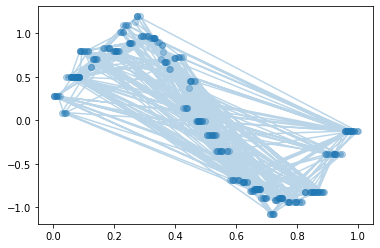

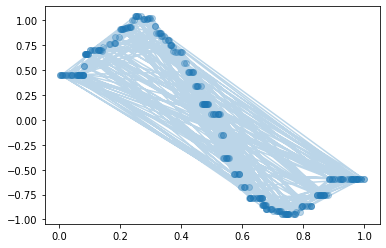

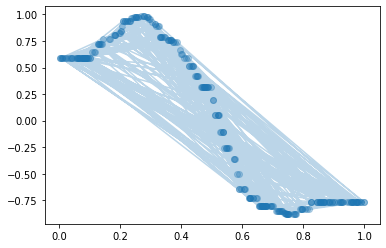

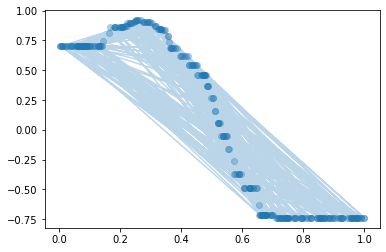

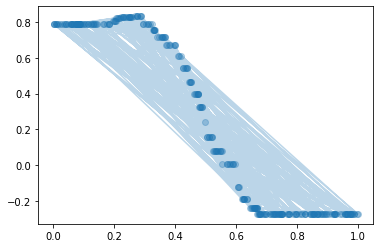

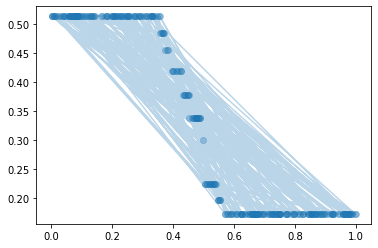

In [ ]:
N_sizes_plot = [1,5,10,15,25,40] #Plot these neighborhood sizes
y_hat = []
for i in N_sizes_plot:
  y_hat.append(KNN(i, x,y,x_test))


#KNN result for neighborhood of all possible sizes?
print(np.array(y_hat).shape)
#Hint: call KNN(N_size, x_train, Y_train, x_test) iteratively for each
#neighborhood size and plot
for i in range(len(N_sizes_plot)):
  # p.step(x_test, y_hat[i], where='post', label='post')
  p.plot(x_test, y_hat[i], 'o-',  alpha=0.3)
  show(p)

#Hint: plot with transparecy to see all lines


###Evaluation:

####Generalization Error (GE):

In [ ]:
### GE Calculation:
def GE(y_test, y_hat):
  GE = []
  for i in y_hat:
    y_hat_mean = np.mean(i)
    y_test_sum = 0
    for i in y_test:
      y_test_sum += (i-y_hat_mean)*(i-y_hat_mean)

    GE.append(np.mean(y_test_sum / len(y_test)))
  return GE

GE_result = GE(y_test,y_hat)
print(GE_result)


[0.4909627233554341, 0.49078564989911155, 0.490932876804537, 0.49678186687435244, 0.566745509111784, 0.614034257898339]


####Model Prediction Error (ME):

In [ ]:
### ME Calculation:
def ME(x_test,y_hat):
  ME = []
  for i in y_hat:
    y_hat_mean = np.mean(i)

    fx_test_sum = 0
    for i in x_test:
        tmp = math.sin(2*math.pi*i)
        fx_test_sum += pow(tmp-y_hat_mean,2)
    ME.append(np.mean(fx_test_sum / len(x_test)))
  return ME

ME_result = ME(x_test,y_hat)
print(ME_result)


[0.4858403799908174, 0.48556155385331334, 0.4858019183706716, 0.49213077973534886, 0.5635509105471399, 0.6113942591990112]


####Training Error (TE):

In [ ]:
### Regression of training dataset values:
for i in x:
  print(i)
#KNN result for training data input?
x_hat = []
for i in N_sizes_plot:
  x_hat.append(KNN(i, x,y,x))

# print(x_hat)
#TE Calculation:
def TE(y,x_hat):
  TE = []
  for i in x_hat:
    x_hat_mean = np.mean(i)

    y_sum = 0
    for i in y:
      y_sum += np.square(i - x_hat_mean)
    TE.append(np.mean(y_sum/len(y)))
  return TE

TE_result = TE(y,x_hat)
print(TE_result)


[0.5084396959867197, 0.5084510341145696, 0.508912980404572, 0.5114711132175258, 0.5383654788306556, 0.5250598679552284]


####Errors Plot:

[1, 5, 10, 15, 25, 40]


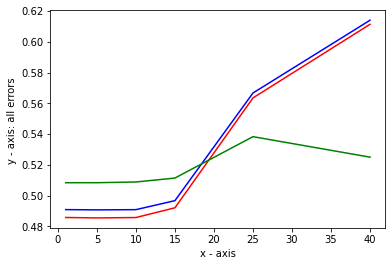

In [ ]:
#Visualization of all errors alltogether? Different axis for two different trends?

print(N_sizes_plot)
# p.legend(labels = ['GE','ME', 'TE'])
p.xlabel('x - axis')
p.ylabel('y - axis: all errors ')
p.plot(N_sizes_plot, GE_result, color='b', label = 'GE')
p.plot(N_sizes_plot, ME_result, color='r', label = 'ME')
p.plot(N_sizes_plot, TE_result, color='g', label = 'TE')
p.show()
